In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [2]:
df=pd.read_csv("Real_Fake_News.csv")

In [3]:
df['author']= label_encoder.fit_transform(df['author'])
df['source']= label_encoder.fit_transform(df['source'])

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,128,"New York is ""leading the nation with the lowes...",1035,True,REAL,1
1,1,1,82,“Iowa ranks 45th in the U.S. for internet conn...,247,True,REAL,1
2,2,2,87,“FUN FACT: West Virginia is home to zero billi...,321,True,REAL,1
3,3,3,186,Says gubernatorial candidate Rebecca Kleefisch...,791,True,REAL,1
4,4,4,252,"The Biden administration ""published a study co...",1153,True,REAL,1
...,...,...,...,...,...,...,...,...
4865,2431,2431,34,"""Clinton campaign official arrested by FBI on ...",135,False,FAKE,0
4866,2432,2432,215,"""Our courts find that 80 percent of those who ...",622,False,FAKE,0
4867,2433,2433,161,Says a progressive income tax proposal from De...,443,False,FAKE,0
4868,2434,2434,192,"""Maxine Waters Is Getting Criminally Charged!""",135,False,FAKE,0


In [5]:
X=df[['author','source']]
y=df['BinaryNumTarget']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [8]:
y_pred = knn.predict(X_test)

In [9]:
confusion_matrix(y_test, y_pred)

array([[477, 128],
       [ 81, 532]], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(y_test, y_pred)

0.8284072249589491

In [12]:
from sklearn.metrics import precision_recall_fscore_support

In [13]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.85483871, 0.80606061]),
 array([0.78842975, 0.86786297]),
 array([0.82029235, 0.8358209 ]),
 array([605, 613], dtype=int64))

In [14]:
from sklearn.metrics import precision_score

In [15]:
precision_score(y_test, y_pred)

0.806060606060606

In [20]:
from sklearn.metrics import recall_score

In [17]:
recall_score(y_test, y_pred)

0.867862969004894

In [21]:
from sklearn.metrics import f1_score

In [22]:
f1_score(y_test, y_pred)

0.8358208955223881

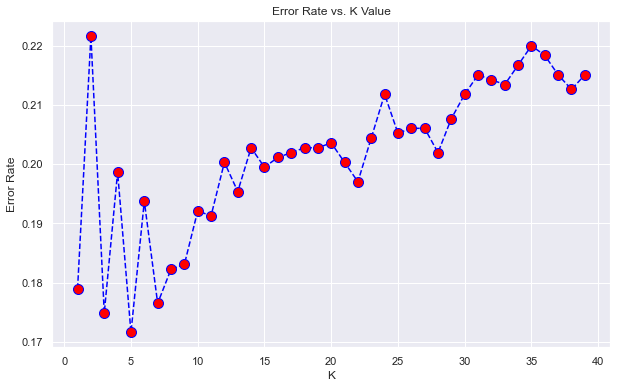

Minimum error:- 0.17159277504105086 at K = 5


In [23]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [25]:
y_pred = knn.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.8284072249589491